# 线性支持向量机

scikit-learn的datasets模块有一个很炫酷的技巧，我还没有告诉你的是，你可以生成任意大小和复杂度的随机数据集。下面是一些值得注意的函数：
- datasets.make_classification(\[n_samples,…])：这个函数生成一个随机的n类分类问题，我们可以指定样本数、特征数以及目标标签数。
- datasets.make_regression(\[n_samples,…])：这个函数生成一个随机回归问题。
- datasets.make_blobs(\[n_samples, n_features,…])：这个函数生成我们可用于聚类的一些高斯分布。

这就表示我们可以使用make_classification为一个二值分类任务建立一个自定义的数据集。

## 1. 生成数据集

In [1]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=7816)
X.shape, y.shape

((100, 2), (100,))

## 2. 数据集的可视化

Text(0, 0.5, 'y values')

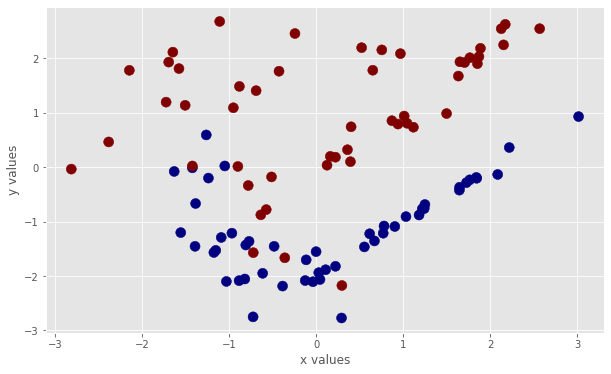

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

## 3. 数据集的预处理

X中的所有特征值必须是32位浮点数。

目标标签必须是–1或者+1。

In [3]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. 建立支持向量机

### 1）调用create方法，构建一个新的SVM：

In [4]:
import cv2
svm = cv2.ml.SVM_create()
# 一个SVM试图用一条直线划分数据。这可以用setKernel方法来指定：
svm.setKernel(cv2.ml.SVM_LINEAR)

### 2）调用分类器的train方法，找到最优决策边界：

In [5]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

### 3）调用分类器的predict方法，预测测试集中所有数据样本的目标标签：

In [6]:
_, y_pred = svm.predict(X_test)

### 4）使用scikit-learn的metrics方法，给分类器打分：

In [7]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

## 5. 决策边界的可视化

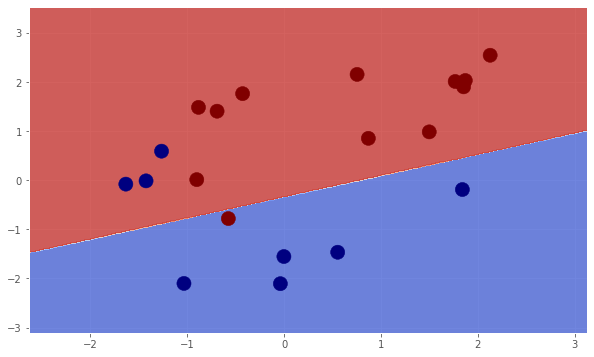

In [8]:
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # 采样步长为h
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

plt.figure(figsize=(10, 6))
plot_decision_boundary(svm, X_test, y_test)

OpenCV提供了一系列供实验使用的SVM核。一些最常用的核包括：

- cv2.ml.SVM_LINEAR：这个核我们之前用过。它在原始特征空间（x和y值）中提供了一条线性决策边界。
- cv2.ml.SVM_POLY：这个核在原始特征空间中提供了多项式函数的一个决策边界。为了使用这个核，我们还必须通过svm.setCoef0（常设置为0）指定一个系数，通过svm.setDegree指定多项式的次数。
- cv2.ml.SVM_RBF：这个核实现了我们之前讨论过的那类高斯函数。
- cv2.ml.SVM_SIGMOID：这个核实现了一个S型函数，类似于我们在第3章中讨论逻辑回归时遇到的一个函数。
- cv2.ml.SVM_INTER：这个核是OpenCV 3新添加的。它根据直方图的相似性拆分类。

# 实现非线性支持向量机

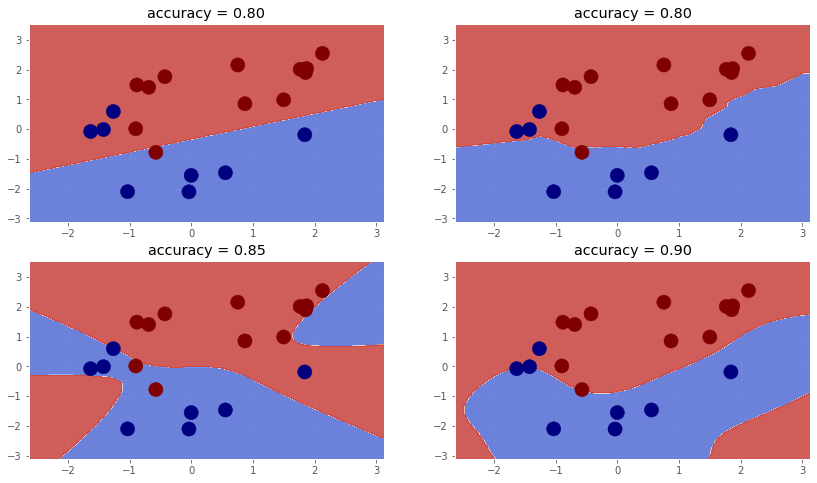

In [9]:
kernels = [cv2.ml.SVM_LINEAR, cv2.ml.SVM_INTER, cv2.ml.SVM_SIGMOID, cv2.ml.SVM_RBF]

plt.figure(figsize=(14, 8))
for idx, kernel in enumerate(kernels):
    svm = cv2.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    _, y_pred = svm.predict(X_test)
    
    plt.subplot(2, 2, idx + 1)
    plot_decision_boundary(svm, X_test, y_test)
    plt.title('accuracy = %.2f' % metrics.accuracy_score(y_test, y_pred))